In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

In [ ]:
#convert into dataset matrix
def convertToMatrix(data,step):
  X, Y=[],[]
  for i in range(len(data)-step):
    d=i+step
    X.append(data[i:d,])
    Y.append(data[d,])
  return np.array(X),np.array(Y)

step=4
N=1000
Tp=800

t=np.arange(0,N)
x=np.sin(0.02*t)+2*np.random.rand(N)
df=pd.DataFrame(x)
df.head()

,0
0,1.560359
1,1.673109
2,0.183510
3,1.715137
4,1.170842


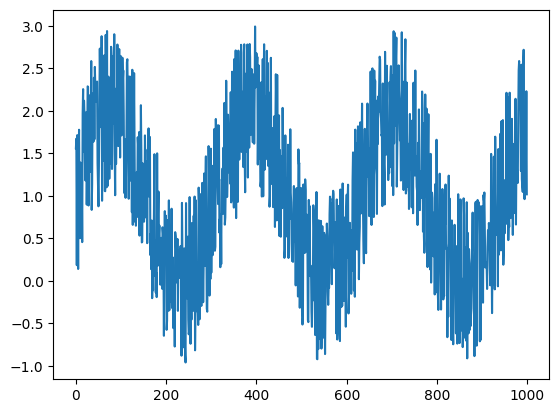

In [ ]:
plt.plot(df)
plt.show()

In [ ]:
values=df.values
train,test=values[0:Tp,:],values[Tp:N,:]

In [ ]:
#add step elements into train and test
test=np.append(test,np.repeat(test[-1,],step))
train=np.append(train,np.repeat(train[-1,],step))

trainX,trainY=convertToMatrix(train,step)
testX,testY=convertToMatrix(test,step)
trainX=np.reshape(trainX,(trainX.shape[0],1,trainX.shape[1]))
testX=np.reshape(testX,(testX.shape[0],1,testX.shape[1]))

In [ ]:
model=Sequential()
model.add(SimpleRNN(units=32,input_shape=(1,step),activation="relu"))
model.add(Dense(8,activation="relu"))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='rmsprop')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 32)                1184      
                                                                 
 dense (Dense)               (None, 8)                 264       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1457 (5.69 KB)
Trainable params: 1457 (5.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(trainX,trainY,epochs=100,batch_size=16,verbose=2)

Epoch 1/100
50/50 - 1s - loss: 2.0250 - 1s/epoch - 21ms/step
Epoch 2/100
50/50 - 0s - loss: 1.0539 - 83ms/epoch - 2ms/step
Epoch 3/100
50/50 - 0s - loss: 0.4781 - 79ms/epoch - 2ms/step
Epoch 4/100
50/50 - 0s - loss: 0.4134 - 92ms/epoch - 2ms/step
Epoch 5/100
50/50 - 0s - loss: 0.4097 - 74ms/epoch - 1ms/step
Epoch 6/100
50/50 - 0s - loss: 0.4055 - 77ms/epoch - 2ms/step
Epoch 7/100
50/50 - 0s - loss: 0.4030 - 80ms/epoch - 2ms/step
Epoch 8/100
50/50 - 0s - loss: 0.4037 - 78ms/epoch - 2ms/step
Epoch 9/100
50/50 - 0s - loss: 0.4010 - 76ms/epoch - 2ms/step
Epoch 10/100
50/50 - 0s - loss: 0.4007 - 75ms/epoch - 2ms/step
Epoch 11/100
50/50 - 0s - loss: 0.3985 - 75ms/epoch - 2ms/step
Epoch 12/100
50/50 - 0s - loss: 0.3990 - 77ms/epoch - 2ms/step
Epoch 13/100
50/50 - 0s - loss: 0.3980 - 76ms/epoch - 2ms/step
Epoch 14/100
50/50 - 0s - loss: 0.3967 - 74ms/epoch - 1ms/step
Epoch 15/100
50/50 - 0s - loss: 0.3950 - 78ms/epoch - 2ms/step
Epoch 16/100
50/50 - 0s - loss: 0.3949 - 78ms/epoch - 2ms/step
Ep

In [ ]:
trainPredict=model.predict(trainX)

25/25 [==============================] - 0s 1ms/step


In [ ]:
testPredict=model.predict(testX)

7/7 [==============================] - 0s 2ms/step


In [ ]:
predicted=np.concatenate((trainPredict,testPredict),axis=0)

In [ ]:
trainScore=model.evaluate(trainX,trainY,verbose=0)
print(trainScore)

0.3627541661262512


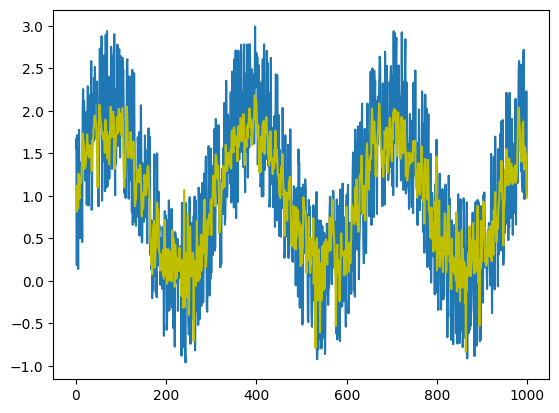

In [ ]:
index = df.index.values
plt.plot(index,df)
plt.plot(index,predicted, c='y')
plt.show()